In [ ]:
"""
Gaussian-Bernoulli RBM for ART IMAGES 

 Art images given in npy arrays

VanGogh64x64.npy
StillLife64x64.npy
Modigliani_paintings.npy
Abstractblue.npy

#image values are already normalized in [0 1]

libraries: 

!pip install opencv-python tensorflow keras numpy scikit-learn

"""


In [ ]:

"""
load data set and plot a few samples

available images

VanGogh64x64.npy
Monet64x64.npy
StillLife64x64.npy
Modigliani_paintings.npy
AbstractPaintings_Dataset.npy
Abstractblue.npy
NEURON64x64.npy
NEURON128x128.npy
STUDENT_PHOTOS64x64.npy
STUDENT_PHOTOS128x128.npy
STUDENT_PHOTOS128x150.npy
STUDENT_PHOTOS128x200.npy
STUDENT_PHOTOS128x256.npy


"""

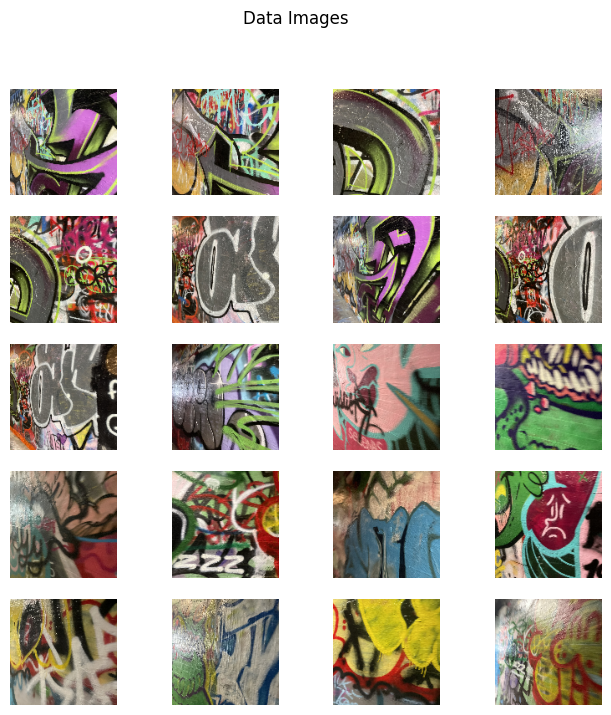

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#data already normalized by 255, in the range [0 1]

#dataset shape: (num_img, size, size, channels)
#data1 = np.load("STUDENT_PHOTOS128x128.npy")
#data2 = np.load("NEURON128x128.npy")
#data3 = np.load("Abstractblue.npy")
#data4 = np.load("PIimages32x32.npy")
#data5 = np.load("PIimages128x128.npy")
#data6 = np.load("VanGogh32x32.npy")

#Piet_Mondrian128x128.npy
#Gustav_Klimt128x128.npy
#Henri_Matisse128x128.npy 
#Jackson_Pollock128x128.npy 
#Pablo_Picasso128x128.npy
#Andy_Warhol_faces128x128.npy
#Frida_Khalo_faces128x128.npy
#Vasiliy_Kandinskiy_geometric128x128.npy
#Amedeo_Modigliani_faces128x128.npy
#Pablo_Picasso_faces128x128.npy


#Piet_Mondrian128x128.npy
#Gustav_Klimt128x128.npy
#Henri_Matisse128x128.npy 
#Jackson_Pollock128x128.npy 
#Pablo_Picasso128x128.npy


#data already normalized by 255, in the range [0 1]

#dataset shape: (num images, size, size, channels)
#data = np.load("NEURON128x128.npy")

data0 = np.load("Piet_Mondrian128x128.npy")
data1 = np.load("STUDENT_PHOTOS128x128.npy")
data3 = np.load("Abstractblue.npy")
data4 = np.load("Frida_Kahlo128x128.npy")
data5 = np.load("Andy_Warhol64x64.npy")  

data6 = np.load("Piet_Mondrian_geometric128x128.npy")
data7 = np.load("Jackson_Pollock128x128.npy")
data8 = np.load("Pablo_Picasso_faces128x128.npy")
data9 = np.load("FinalLightPaintingData128x128.npy")
data10 = np.load("Tunnel128x128.npy")
data11 = np.load("Butterfly128x128.npy")
data12 = np.load("Gabbiano_portrait64x64.npy")
data13 = np.load("Gabbiano_portrait128x128.npy")
data14 = np.load("STUDENT_PHOTOS128x128.npy")

data = data10

filename = "STUDENT_PHOTOS128x128"

# Step 1: Load the corresponding array from the original file
data = np.load(filename + ".npy")


#combined_dataset
#data  = np.concatenate((data10, data11), axis=0)

# for monochromatic images (1 color channel)
#data = data1[:,:,:,1:2] # keep channel dimension =1 


num_samples, img_size1, img_size1, channels = data.shape

fig, axes = plt.subplots(5, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    img = data[i]
    img = (img - img.min()) / (img.max() - img.min())  # Normalize for visualization
    ax.imshow(img)
    ax.axis("off")
    plt.suptitle("Data Images")

plt.savefig("RBMdata_" + filename + ".png", format="png", dpi=300)  # Save as PNG
plt.savefig("RBMdata_" + filename + ".eps", format="eps")  # Save as PDF
plt.savefig("RBMdata_" + filename + ".pdf", format="pdf")  # Save as PDF
plt.savefig("RBMdata_" + filename + ".tiff", format="tiff", dpi=300)  # Save as TIFF
plt.show()

data.shape

print("data loaded")


In [7]:
data.shape


3

In [ ]:
"""
RBM needs as input: 

numpy array filename = data (num_images x size x size x channels) 

number of hidden neurons (hidden_size) line 161 of the next cell 
number of epochs (epochs)  line 186 of the next cell 
learning rate  (hidden_size)
batch_size (batch_size)

"""


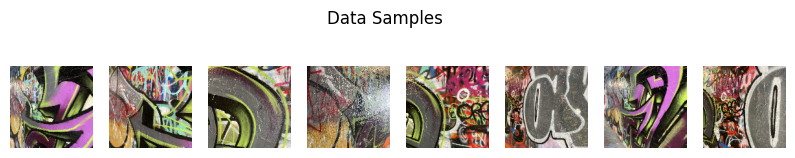

start training
Epoch 2207/4000 completed, error=0.043563377254950256 

KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from scipy.special import expit



# Define stable sigmoid function
#def sigmoid(x):
#    return 1 / (1 + np.exp(-x))
def sigmoid(x):
    return expit(x)

def batch_normalize(v):
    mean = np.mean(v, axis=0, keepdims=True)
    std = np.std(v, axis=0, keepdims=True) + 1e-8  # Avoid division by zero
    return (v - mean) / std
    
    
# Initialize RBM parameters
class GaussianBernoulliRBM:
    def __init__(self, visible_units, hidden_units, learning_rate, sig):
        self.v_units = visible_units
        self.h_units = hidden_units
        self.lr = learning_rate
        self.sigma = sig
        
        # Initialize weights and biases
        self.W = np.random.randn(self.v_units, self.h_units) * 0.01  # Small random values
        self.b_v = np.zeros(self.v_units)  # Visible biases
        self.b_h = np.zeros(self.h_units)  # Hidden biases

    # Forward pass: Sample hidden states given visible states
    def sample_hidden(self, v):
        h_mean = sigmoid( np.dot(v, self.W)/( (self.sigma) **2 ) + self.b_h )
        #h_sample = np.random.binomial(1, h_mean)  # Bernoulli sample
        h_sample = (np.random.uniform(size=h_mean.shape) < h_mean).astype(np.float32)
        return h_mean, h_sample

    # Backward pass: Sample visible states given hidden states
    def sample_visible(self, h):
        v_mean = np.dot(h, self.W.T) + self.b_v  # Gaussian visible layer
        v_sample = v_mean + self.sigma * np.random.randn(*v_mean.shape)  # Add Gaussian noise
        return v_mean, v_sample

    # Train RBM with Contrastive Divergence (CD-1)
    def train(self, data, epochs, batch_size):
        num_samples = data.shape[0]
        error_list =[]
        for epoch in range(epochs):
            np.random.shuffle(data)  # Shuffle data each epoch
            error = 0
            for i in range(0, num_samples, batch_size):
                v_0 = batch_normalize( data[i:i+batch_size] )  # Mini-batch

                # Positive phase
                h_0_mean, h_0_sample = self.sample_hidden(v_0)

                # Negative phase (Reconstruct visible layer)
                v_k_mean, v_k_sample = self.sample_visible(h_0_sample)
                h_k_mean, _ = self.sample_hidden(v_k_sample)

                # Update weights and biases
                self.W += self.lr * (np.dot(v_0.T, h_0_mean) - np.dot(v_k_sample.T, h_k_mean)) / batch_size
                self.b_v += self.lr * np.mean(v_0 - v_k_sample, axis=0)
                self.b_h += self.lr * np.mean(h_0_mean - h_k_mean, axis=0)

                error += np.mean( np.mean( np.abs( v_0 - v_k_mean ), axis=0 ) )

            print(f"\rEpoch {epoch+1}/{epochs} completed, error={error}", end=" ")

        error_list.append(error)
        return error_list


        # Train RBM with Contrastive Divergence (CD-1) + save hidden variables
    def train2(self, data, epochs, batch_size):
        num_samples = data.shape[0]
        error_list = []
        hidden_vars_list = []  # Store hidden variables for all images
    
        for epoch in range(epochs):
            np.random.shuffle(data)  # Shuffle data each epoch
            error = 0
            hidden_epoch = []  # Store hidden variables for the current epoch
    
            for i in range(0, num_samples, batch_size):
                v_0 = data[i:i+batch_size]  # Mini-batch
    
                # Positive phase
                h_0_mean, h_0_sample = self.sample_hidden(v_0)
    
                # Store hidden representations
                hidden_epoch.append(h_0_mean)
    
                # Negative phase (Reconstruct visible layer)
                v_k_mean, v_k_sample = self.sample_visible(h_0_sample)
                h_k_mean, _ = self.sample_hidden(v_k_sample)
    
                # Update weights and biases
                self.W += self.lr * (np.dot(v_0.T, h_0_mean) - np.dot(v_k_sample.T, h_k_mean)) / batch_size
                self.b_v += self.lr * np.mean(v_0 - v_k_sample, axis=0)
                self.b_h += self.lr * np.mean(h_0_mean - h_k_mean, axis=0)
    
                error += np.mean(np.mean(np.abs(v_0 - v_k_mean), axis=0))
    
            print(f"\rEpoch {epoch+1}/{epochs} completed, error={error}", end=" ")
    
            error_list.append(error)
            hidden_vars_list.append(np.vstack(hidden_epoch))  # Stack batch results
    
        return error_list, np.vstack(hidden_vars_list)  # Return hidden variables for all images
    
    
    # Generate samples from the trained RBM
    def generate_samples(self, num_samples, steps):
        v = np.random.randn(num_samples, self.v_units)  # Random initialization

        for _ in range(steps):  # Gibbs Sampling
            h_mean, h_sample = self.sample_hidden(v)
            v_mean, v = self.sample_visible(h_sample)

        return v_mean, h_mean # Return final generated visible samples and hidden variables 

"""
# main 
#data = np.load("VanGogh.npy")
#dataset shape:(855, 64, 64, 3)
#data already normalized by 255, in the range [0 1]
"""

num_samples, img_size, canc, channels = data.shape
hidden_size = 64 # number of hidden variables 

data_flat = data.reshape(num_samples, -1) #Array  num_samples x img_size^2

# Normalize images to [-1,1] for Gaussian-Bernoulli RBM
data_flat = (data_flat - 0.5) * 2  

fig, axes = plt.subplots(1, 8, figsize=(10, 2))
for i, ax in enumerate(axes):
    img = data[i].reshape(img_size, img_size, channels)
    img = (img - img.min()) / (img.max() - img.min())  # Normalize for visualization
    ax.imshow(img)
    ax.axis("off")
    plt.suptitle("Data Samples")

#plt.savefig("DataSamples.png", format="png", dpi=300)  # Save as PNG
#plt.savefig("DataSamples.eps", format="eps")  # Save as PDF
#plt.savefig("DataSamples.pdf", format="pdf")  # Save as PDF
#plt.savefig("DataSamples.tiff", format="tiff", dpi=300)  # Save as TIFF

plt.show()

print("start training")
# Train RBM on CBL Faces
rbm = GaussianBernoulliRBM(visible_units=channels*img_size**2, hidden_units=hidden_size, learning_rate=0.025, sig=0.1)
rbm.train2(data_flat, epochs=4000, batch_size=16)

# Generate and plot new face samples
generated_data, generated_hidden_var= rbm.generate_samples(num_samples=25, steps=50)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = generated_data[i].reshape(img_size, img_size, channels)
    img = (img - img.min()) / (img.max() - img.min())  # Normalize for visualization
    ax.imshow(img, cmap='winter')
    ax.axis("off")
    plt.suptitle("Generated Samples") 
    
plt.savefig("RBMGenerated_" + filename + ".png", format="png", dpi=300)  # Save as PNG
plt.savefig("RBMGenerated_" + filename + ".eps", format="eps")  # Save as PDF
plt.savefig("RBMGenerated_" + filename + ".pdf", format="pdf")  # Save as PDF
plt.savefig("RBMGenerated_" + filename + ".tiff", format="tiff", dpi=300)  # Save as TIFF    

plt.show()

hidden_n = int(np.sqrt(hidden_size)) 
# Plot weight columns as images (Visualizing hidden features)
fig, axes = plt.subplots(hidden_n, hidden_n, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < rbm.h_units:
        img = rbm.W[:, i].reshape(img_size, img_size, channels)
        img = (img - img.min()) / (img.max() - img.min())  # Normalize for visualization
        ax.imshow(img, cmap='winter')
    ax.axis("off")
plt.suptitle("Weight Columns as Images (Hidden Features)")

plt.savefig("RBMhiddenfeatures_" + filename + ".png", format="png", dpi=300)  # Save as PNG
plt.savefig("RBMhiddenfeatures_" + filename + ".eps", format="eps")  # Save as PDF
plt.savefig("RBMhiddenfeatures_" + filename + ".pdf", format="pdf")  # Save as PDF
plt.savefig("RBMhiddenfeatures_" + filename + ".tiff", format="tiff", dpi=300)  # Save as TIFF 

plt.show()




In [ ]:
"""
PLOT PROBABILITY DENSITY FUNCTION OF DATA
"""

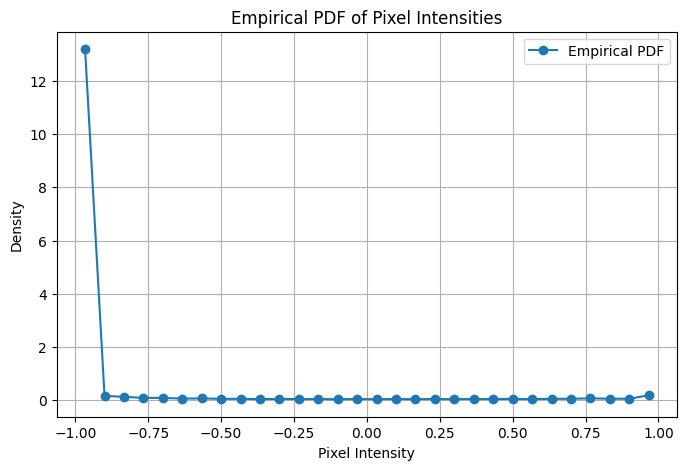

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assume x_train is (400, 32, 32)
x1= data_flat.reshape(-1)  # Flatten all pixels into 1D

# Compute histogram (PDF estimation)
hist, bins = np.histogram(x1, bins=30, density=True)

# Compute bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot empirical PDF
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, hist, linestyle='-', marker='o', label="Empirical PDF")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")
plt.title("Empirical PDF of Pixel Intensities")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
"""
Generate and plot new samples
"""


In [ ]:
# Generate and plot new face samples
generated_faces, generated_hidden_var= rbm.generate_samples(num_samples=36, steps=150)

fig, axes = plt.subplots(6, 6, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = generated_faces[i].reshape(img_size, img_size, channels)
    img =  (img - img.min()) / (img.max() - img.min())  # Normalize for visualization
    ax.imshow(img, cmap='winter')
    ax.axis("off")
    plt.suptitle("Generated Samples")
    
plt.savefig("RBMGenerated_" + filename + ".png", format="png", dpi=300)  # Save as PNG
plt.savefig("RBMGenerated_" + filename + ".eps", format="eps")  # Save as PDF
plt.savefig("RBMGenerated_" + filename + ".pdf", format="pdf")  # Save as PDF
plt.savefig("RBMGenerated_" + filename + ".tiff", format="tiff", dpi=300)  # Save as TIFF 

plt.show()


In [ ]:
"""
Plot weight columns as images (Visualizing hidden features)
"""

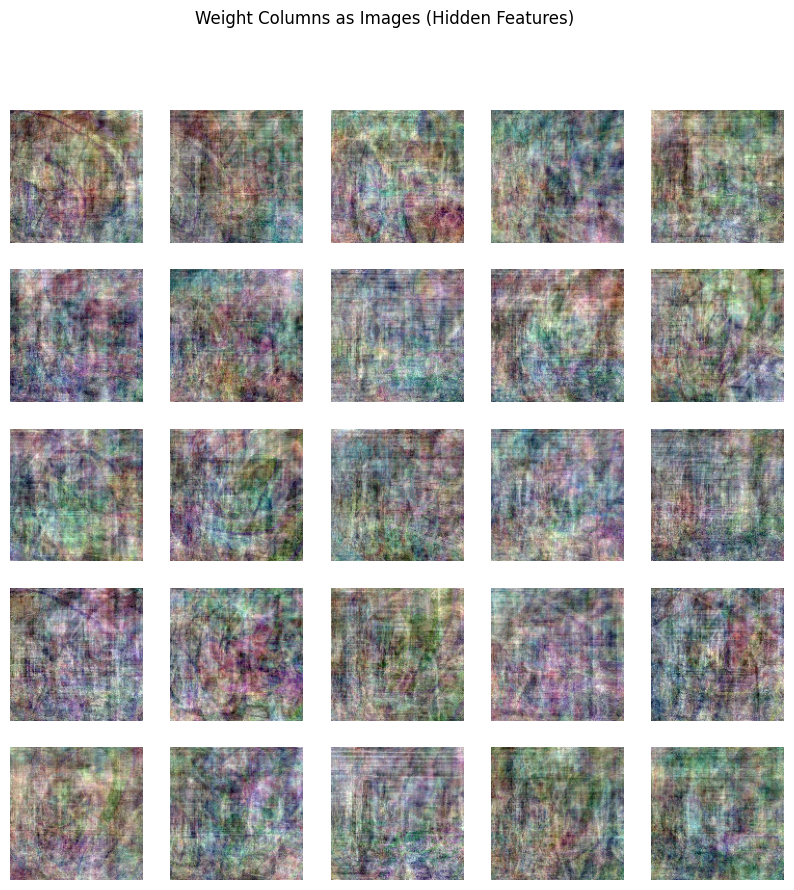

In [ ]:

# Plot weight columns as images (Visualizing hidden features)
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < rbm.h_units:
        img = rbm.W[:, i].reshape(img_size, img_size, channels)
        img = (img - img.min()) / (img.max() - img.min())  # Normalize for visualization
        ax.imshow(img, cmap='winter')
    ax.axis("off")
plt.suptitle("Weight Columns as Images (Hidden Features)")

plt.savefig("RBMhiddenfeatures_" + filename + ".png", format="png", dpi=300)  # Save as PNG
plt.savefig("RBMhiddenfeatures_" + filename + ".eps", format="eps")  # Save as PDF
plt.savefig("RBMhiddenfeatures_" + filename + ".pdf", format="pdf")  # Save as PDF
plt.savefig("RBMhiddenfeatures_" + filename + ".tiff", format="tiff", dpi=300)  # Save as TIFF 

plt.show()


In [ ]:
"""

RBM for latent vectors

""" 

In [5]:
generated_data[0,:]

array([ 3.84683946e-02,  7.95344115e-04,  5.53260804e-03, -2.38480775e-02,
       -2.15166592e-02, -6.34144921e-02, -3.31984884e-02, -2.20760495e-02,
       -6.42718946e-03,  7.55988014e-02,  1.94309623e-02, -1.05071121e-01,
        6.05258514e-02,  1.35948270e-02,  5.05911964e-02, -1.68989974e-03,
        9.24376348e-02, -1.96530897e-01, -2.58799498e-02, -2.37953776e-02,
        4.37355871e-02, -1.14214875e-04,  3.49139088e-02, -2.55226128e-02,
       -3.90636227e-02,  3.30117849e-02,  2.12739032e-03,  4.42613292e-03,
        2.63060697e-02,  5.59055257e-02,  1.47906688e-01, -6.83790242e-02,
        1.61072410e-02,  1.55551789e-01,  1.21403854e-01, -9.63539461e-02,
       -3.52324507e-02,  6.32357015e-03,  7.75242852e-02,  2.68437606e-02,
        3.03397268e-02, -2.19715620e-02,  3.02612976e-02, -5.20403027e-02,
        4.89771309e-02,  2.87119721e-03, -4.80411937e-02, -4.33784481e-02,
       -4.89896895e-02, -9.17265952e-03, -6.98050190e-03,  8.35551114e-03,
       -7.08133078e-03, -